In [ ]:
# install missing packages
!pip -q install torchsummary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torchsummary import summary
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pathlib import Path
import re


# set background color to white
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

# set default figure size
matplotlib.rcParams['figure.figsize'] = (15, 7)

In [ ]:

from google.colab import drive

drive.mount('/content/drive') # Mount your Google Drive first

# Update this path to where your dataset is in Google Drive
image_dir_train = Path('/content/drive/MyDrive/fish_Classification/train_split')



# Create a list of all filepaths
filepaths_train = []
expected_extensions_train = ['jpg', 'jpeg', 'png', 'bmp', 'tiff'] # List of all expected extensions
for ext_train in expected_extensions_train:
    filepaths_train.extend(list(image_dir_train.glob(f'**/*.{ext_train}'))) # Search for each extension

#filepaths = list(image_dir.glob(r'**/*.jpg'))
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_train))
filepaths_train = pd.Series(filepaths_train, name='Filepath_train').astype(str)
labels_train = pd.Series(labels_train, name='Label_train')
image_df_train = pd.concat([filepaths_train, labels_train], axis=1)

print(image_df_train.head())
print(f"Total images found for train: {len(image_df_train)}")

Mounted at /content/drive
                                      Filepath_train  \
0  /content/drive/MyDrive/fish_Classification/tra...   
1  /content/drive/MyDrive/fish_Classification/tra...   
2  /content/drive/MyDrive/fish_Classification/tra...   
3  /content/drive/MyDrive/fish_Classification/tra...   
4  /content/drive/MyDrive/fish_Classification/tra...   

                      Label_train  
0  Fungal diseases Saprolegniasis  
1  Fungal diseases Saprolegniasis  
2  Fungal diseases Saprolegniasis  
3  Fungal diseases Saprolegniasis  
4  Fungal diseases Saprolegniasis  
Total images found for train: 3200


In [ ]:

import pandas as pd # Make sure pandas is imported
from pathlib import Path # <--- THIS IS THE MISSING IMPORT HERE
from google.colab import drive

drive.mount('/content/drive') # Mount your Google Drive first

# Update this path to where your dataset is in Google Drive
image_dir_test = Path('/content/drive/MyDrive/fish_Classification/test_split ')


# Create a list of all filepaths
filepaths_test = []
expected_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff'] # Use the same list name for consistency
for ext in expected_extensions: # Use 'ext' here, consistent with the list name
    filepaths_test.extend(list(image_dir_test.glob(f'**/*.{ext}')))

labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_test))
image_df_test = pd.DataFrame({'Filepath': filepaths_test, 'Label_test': labels_test}) # Use direct DataFrame creation for conciseness

print(image_df_test.head())
print(f"Total images found for test: {len(image_df_test)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                            Filepath    Label_test
0  /content/drive/MyDrive/fish_Classification/tes...  Healthy Fish
1  /content/drive/MyDrive/fish_Classification/tes...  Healthy Fish
2  /content/drive/MyDrive/fish_Classification/tes...  Healthy Fish
3  /content/drive/MyDrive/fish_Classification/tes...  Healthy Fish
4  /content/drive/MyDrive/fish_Classification/tes...  Healthy Fish
Total images found for test: 303


In [ ]:
image_df_train

,Filepath_train,Label_train
0,/content/drive/MyDrive/fish_Classification/tra...,Fungal diseases Saprolegniasis
1,/content/drive/MyDrive/fish_Classification/tra...,Fungal diseases Saprolegniasis
2,/content/drive/MyDrive/fish_Classification/tra...,Fungal diseases Saprolegniasis
3,/content/drive/MyDrive/fish_Classification/tra...,Fungal diseases Saprolegniasis
4,/content/drive/MyDrive/fish_Classification/tra...,Fungal diseases Saprolegniasis
...,...,...
3195,/content/drive/MyDrive/fish_Classification/tra...,Bacterial Red disease
3196,/content/drive/MyDrive/fish_Classification/tra...,Bacterial gill disease
3197,/content/drive/MyDrive/fish_Classification/tra...,Bacterial gill disease
3198,/content/drive/MyDrive/fish_Classification/tra...,Bacterial gill disease


In [ ]:
image_df_test

,Filepath,Label_test
0,/content/drive/MyDrive/fish_Classification/tes...,Healthy Fish
1,/content/drive/MyDrive/fish_Classification/tes...,Healthy Fish
2,/content/drive/MyDrive/fish_Classification/tes...,Healthy Fish
3,/content/drive/MyDrive/fish_Classification/tes...,Healthy Fish
4,/content/drive/MyDrive/fish_Classification/tes...,Healthy Fish
...,...,...
298,/content/drive/MyDrive/fish_Classification/tes...,Bacterial Red disease
299,/content/drive/MyDrive/fish_Classification/tes...,Fungal diseases Saprolegniasis
300,/content/drive/MyDrive/fish_Classification/tes...,Fungal diseases Saprolegniasis
301,/content/drive/MyDrive/fish_Classification/tes...,Bacterial gill disease


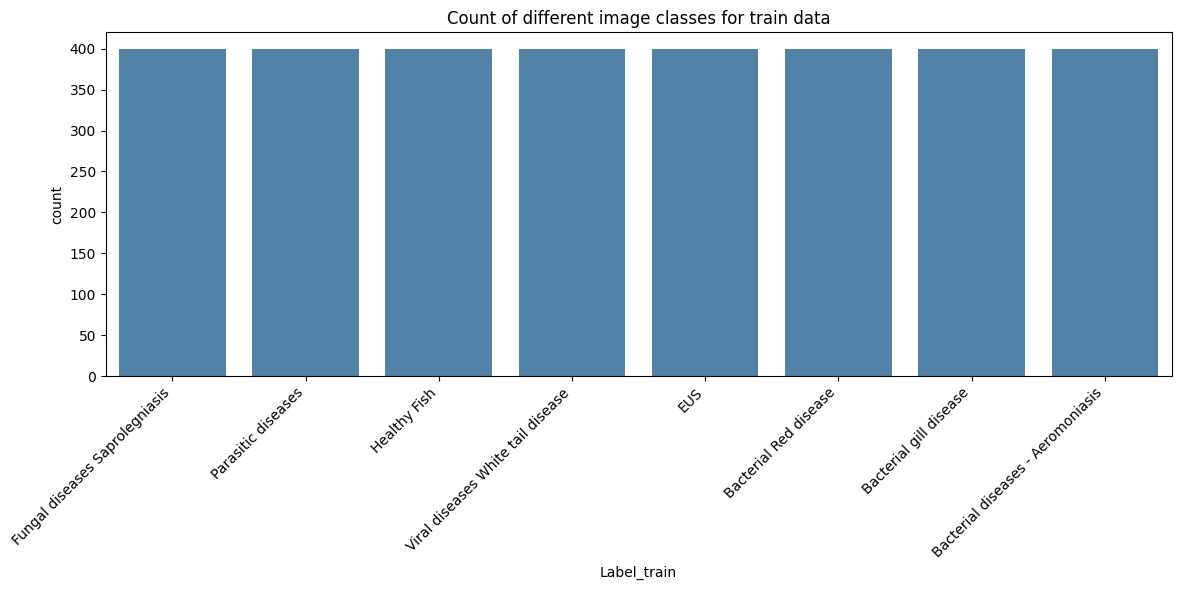

In [ ]:
# count plot for each class
plt.figure(figsize=(12, 6)) # Make the plot wider for better spacing
sns.countplot(x='Label_train', data=image_df_train, color='steelblue').set(title='Count of different image classes for train data')
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees, align them to the right
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

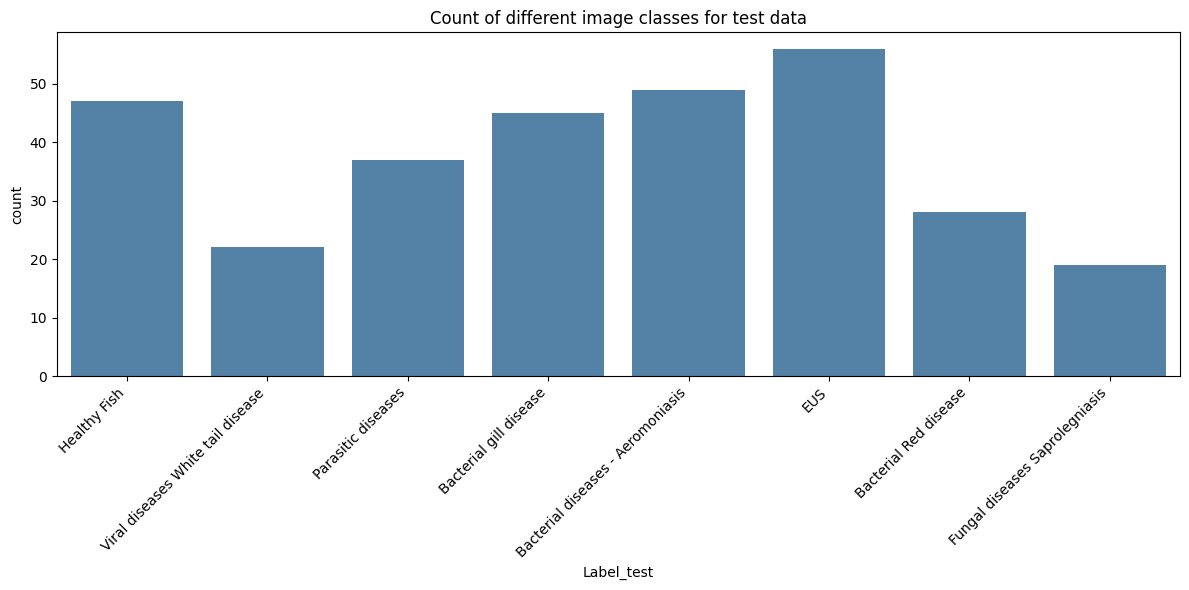

In [ ]:
# count plot for each class
plt.figure(figsize=(12, 6)) # Make the plot wider for better spacing
sns.countplot(x='Label_test', data=image_df_test, color='steelblue').set(title='Count of different image classes for test data')
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees, align them to the right
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
#augumentation
train_transforms = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



In [ ]:
import torch
from torch.utils.data import Dataset, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Custom Wrapper Dataset
class TransformedSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

In [ ]:
image_dir_train = Path('/content/drive/MyDrive/fish_Classification/train_split')
initial_dataset = ImageFolder(root=image_dir_train)




In [ ]:
initial_dataset.classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'EUS',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [ ]:
#Perform the random split on the untransformed data
size = len(initial_dataset)
val_size = int(0.2 * size)
train_size = int(size - val_size)
print(f"number of classes: {len(initial_dataset.classes)}")
print(f"total number of images: {size}")
print(f"total number of train images: {train_size}")
print(f"total number of validation images: {val_size}")
generator = torch.Generator().manual_seed(42)
train_subset, val_subset = random_split(initial_dataset, [train_size, val_size], generator=generator)

number of classes: 8
total number of images: 3200
total number of train images: 2560
total number of validation images: 640


In [ ]:
train_set = TransformedSubset(train_subset, transform=train_transforms)
val_set = TransformedSubset(val_subset, transform=val_test_transforms)


In [ ]:
image_dir_test = Path('/content/drive/MyDrive/fish_Classification/test_split ')
test_set = ImageFolder(root=image_dir_test, transform=val_test_transforms)

In [ ]:
# show a single image
def show_image(img, label, dataset):
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    plt.title(dataset.classes[label])


In [ ]:
show_image(*train_set[0], initial_dataset)

NameError: name 'show_image' is not defined

In [ ]:
# --- 4. Create DataLoaders ---
batch_size = 16
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size)
test_dl = DataLoader(test_set, batch_size=batch_size) # Renamed for clarity


In [ ]:
# visualize a batch of images
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

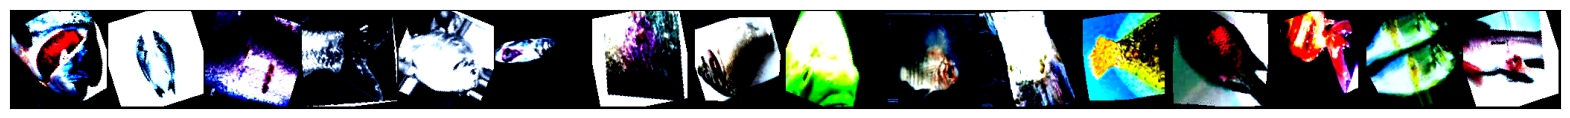

In [ ]:
show_batch(train_dl)

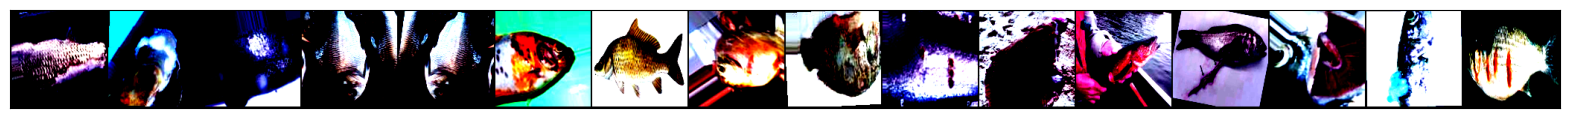

In [ ]:
show_batch(val_dl)

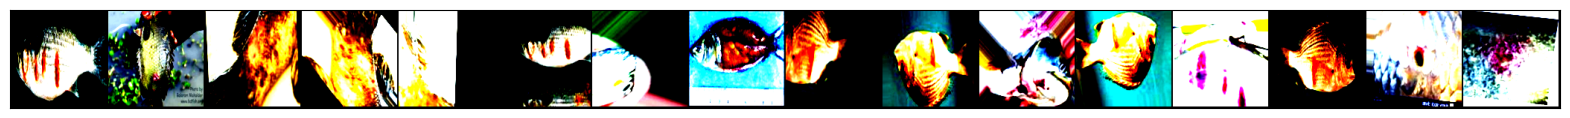

In [ ]:
show_batch(test_dl)

In [ ]:
import torch.nn as nn

# The conv_block is correct.
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)


# --- CORRECTED Custom CNN ---
class FishCustomNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        # --- Convolutional Base (Unchanged) ---
        self.conv1 = conv_block(in_channels, 64)     # Output: 64 x 128 x 128 because pool = false by default
        self.conv2 = conv_block(64, 128, pool=True)  # Output: 128 x 64 x 64
        self.conv3 = conv_block(128, 256, pool=True) # Output: 256 x 32 x 32
        self.conv4 = conv_block(256, 512, pool=True) # Output: 512 x 16 x 16

        # --- Classifier (Fully Connected Layers with BatchNorm1d) ---
        self.classifier = nn.Sequential(
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Dropout(0.2),

            # --- Block 1 of the Classifier ---
            nn.Linear(512 * 8 * 8, 1024),
            nn.BatchNorm1d(1024),  # Add BatchNorm1d for the 1024 features
            nn.ReLU(inplace=True),

            # --- Block 2 of the Classifier ---
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),   # Add BatchNorm1d for the 512 features
            nn.ReLU(inplace=True),

            # --- Final Output Layer ---
            # Typically, we do NOT add BatchNorm or ReLU to the final output layer.
            # The raw output (logits) is needed for the cross-entropy loss function.
            nn.Linear(512, num_classes)
        )

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.classifier(out)
        return out

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # choose device accordingly
model = FishCustomNet(3, 8).to(device) # 3 color channels and 8 output classes
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3)

# model summary (helps in understanding the output shapes)
summary(model, (3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4        [-1, 128, 128, 128]          73,856
       BatchNorm2d-5        [-1, 128, 128, 128]             256
              ReLU-6        [-1, 128, 128, 128]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 256, 64, 64]         295,168
       BatchNorm2d-9          [-1, 256, 64, 64]             512
             ReLU-10          [-1, 256, 64, 64]               0
        MaxPool2d-11          [-1, 256, 32, 32]               0
           Conv2d-12          [-1, 512, 32, 32]       1,180,160
      BatchNorm2d-13          [-1, 512, 32, 32]           1,024
             ReLU-14          [-1, 512,

In [ ]:
# multiclass accuracy
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    #acc = torch.round(acc * 100)
    return acc

In [ ]:
# training loop
epochs = 100
history = []

for epoch in range(epochs):
    # --- Training Phase ---
    model.train()
    running_train_loss = 0.0
    running_train_acc = 0.0

    with tqdm(train_dl, unit="batch") as tepoch:
        for data, target in tepoch:
            tepoch.set_description(f"Epoch {epoch + 1}")
            data, target = data.to(device), target.to(device)

            optim.zero_grad()
            out = model(data)
            loss = criterion(out, target)
            acc = multi_acc(out, target) # Assuming this now returns a fraction (e.g., 0.75)
            loss.backward()
            optim.step()

            running_train_loss += loss.item()
            running_train_acc += acc.item()

            # --- THE ONLY CHANGE IS HERE ---
            # Multiply by 100 to correctly format the percentage for display
            tepoch.set_postfix(loss=loss.item(), accuracy=f"{acc.item()*100:.2f}%")

    # --- Validation Phase ---
    model.eval()
    running_val_loss = 0.0
    running_val_acc = 0.0

    with torch.no_grad():
        for data, target in val_dl:
            data, target = data.to(device), target.to(device)
            out = model(data)
            loss = criterion(out, target)
            acc = multi_acc(out, target)
            running_val_loss += loss.item()
            running_val_acc += acc.item()

    # --- Calculate and print epoch averages ---
    avg_train_loss = running_train_loss / len(train_dl)
    avg_train_acc = running_train_acc / len(train_dl)
    avg_val_loss = running_val_loss / len(val_dl)
    avg_val_acc = running_val_acc / len(val_dl)

    # Store results for plotting
    history.append({
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss,
        'train_acc': avg_train_acc,
        'val_acc': avg_val_acc
    })

    # Print epoch summary
    print(f"Epoch {epoch+1}/{epochs} -> "
          f"Training Loss: {avg_train_loss:.4f}, "
          f"Validation Loss: {avg_val_loss:.4f}, "
          f"Training Accuracy: {avg_train_acc*100:.2f}%, "
          f"Validation Accuracy: {avg_val_acc*100:.2f}%")

Epoch 1: 100%|██████████| 160/160 [16:53<00:00,  6.34s/batch, accuracy=18.75%, loss=1.86]


Epoch 1/100 -> Training Loss: 2.0495, Validation Loss: 1.8892, Training Accuracy: 22.15%, Validation Accuracy: 27.66%


Epoch 2: 100%|██████████| 160/160 [00:34<00:00,  4.65batch/s, accuracy=25.00%, loss=1.88]


Epoch 2/100 -> Training Loss: 1.8835, Validation Loss: 1.7520, Training Accuracy: 29.69%, Validation Accuracy: 35.78%


Epoch 3: 100%|██████████| 160/160 [00:34<00:00,  4.67batch/s, accuracy=25.00%, loss=2.11]


Epoch 3/100 -> Training Loss: 1.7825, Validation Loss: 1.7311, Training Accuracy: 33.40%, Validation Accuracy: 33.75%


Epoch 4: 100%|██████████| 160/160 [00:34<00:00,  4.68batch/s, accuracy=12.50%, loss=2.17]


Epoch 4/100 -> Training Loss: 1.7012, Validation Loss: 1.5026, Training Accuracy: 38.36%, Validation Accuracy: 46.09%


Epoch 5: 100%|██████████| 160/160 [00:34<00:00,  4.68batch/s, accuracy=25.00%, loss=1.85]


Epoch 5/100 -> Training Loss: 1.6182, Validation Loss: 1.4648, Training Accuracy: 42.15%, Validation Accuracy: 45.78%


Epoch 6: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=25.00%, loss=1.73]


Epoch 6/100 -> Training Loss: 1.5318, Validation Loss: 1.3295, Training Accuracy: 43.75%, Validation Accuracy: 51.72%


Epoch 7: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=37.50%, loss=1.75]


Epoch 7/100 -> Training Loss: 1.5145, Validation Loss: 1.3525, Training Accuracy: 46.33%, Validation Accuracy: 51.09%


Epoch 8: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=50.00%, loss=1.75]


Epoch 8/100 -> Training Loss: 1.4053, Validation Loss: 1.2423, Training Accuracy: 50.08%, Validation Accuracy: 54.06%


Epoch 9: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=62.50%, loss=1.16]


Epoch 9/100 -> Training Loss: 1.3516, Validation Loss: 1.2984, Training Accuracy: 51.80%, Validation Accuracy: 54.37%


Epoch 10: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=62.50%, loss=1.24]


Epoch 10/100 -> Training Loss: 1.3171, Validation Loss: 1.0329, Training Accuracy: 52.81%, Validation Accuracy: 64.38%


Epoch 11: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=56.25%, loss=0.966]


Epoch 11/100 -> Training Loss: 1.2675, Validation Loss: 1.0597, Training Accuracy: 55.47%, Validation Accuracy: 62.19%


Epoch 12: 100%|██████████| 160/160 [00:33<00:00,  4.79batch/s, accuracy=50.00%, loss=1.17]


Epoch 12/100 -> Training Loss: 1.1623, Validation Loss: 0.9138, Training Accuracy: 57.97%, Validation Accuracy: 67.34%


Epoch 13: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=56.25%, loss=1.02]


Epoch 13/100 -> Training Loss: 1.1516, Validation Loss: 0.9235, Training Accuracy: 59.61%, Validation Accuracy: 68.12%


Epoch 14: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=62.50%, loss=0.894]


Epoch 14/100 -> Training Loss: 1.0644, Validation Loss: 0.8543, Training Accuracy: 62.66%, Validation Accuracy: 65.31%


Epoch 15: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=75.00%, loss=1.05]


Epoch 15/100 -> Training Loss: 1.0570, Validation Loss: 0.7654, Training Accuracy: 62.93%, Validation Accuracy: 74.06%


Epoch 16: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=75.00%, loss=1]


Epoch 16/100 -> Training Loss: 0.9819, Validation Loss: 0.7408, Training Accuracy: 65.90%, Validation Accuracy: 73.12%


Epoch 17: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=75.00%, loss=0.777]


Epoch 17/100 -> Training Loss: 0.9626, Validation Loss: 0.7030, Training Accuracy: 65.47%, Validation Accuracy: 74.22%


Epoch 18: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=50.00%, loss=1.56]


Epoch 18/100 -> Training Loss: 0.9194, Validation Loss: 0.6487, Training Accuracy: 67.15%, Validation Accuracy: 77.34%


Epoch 19: 100%|██████████| 160/160 [00:33<00:00,  4.78batch/s, accuracy=75.00%, loss=0.665]


Epoch 19/100 -> Training Loss: 0.8429, Validation Loss: 0.6847, Training Accuracy: 71.64%, Validation Accuracy: 73.75%


Epoch 20: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=31.25%, loss=2.1]


Epoch 20/100 -> Training Loss: 0.8282, Validation Loss: 0.6111, Training Accuracy: 72.38%, Validation Accuracy: 80.62%


Epoch 21: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=81.25%, loss=0.677]


Epoch 21/100 -> Training Loss: 0.7962, Validation Loss: 0.6233, Training Accuracy: 71.33%, Validation Accuracy: 78.91%


Epoch 22: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.391]


Epoch 22/100 -> Training Loss: 0.7448, Validation Loss: 0.5543, Training Accuracy: 73.55%, Validation Accuracy: 81.72%


Epoch 23: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=75.00%, loss=0.579]


Epoch 23/100 -> Training Loss: 0.7408, Validation Loss: 0.6207, Training Accuracy: 74.53%, Validation Accuracy: 79.22%


Epoch 24: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=62.50%, loss=0.961]


Epoch 24/100 -> Training Loss: 0.7080, Validation Loss: 0.4836, Training Accuracy: 74.73%, Validation Accuracy: 81.56%


Epoch 25: 100%|██████████| 160/160 [00:33<00:00,  4.71batch/s, accuracy=81.25%, loss=0.641]


Epoch 25/100 -> Training Loss: 0.6572, Validation Loss: 0.5268, Training Accuracy: 76.80%, Validation Accuracy: 82.03%


Epoch 26: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=81.25%, loss=0.528]


Epoch 26/100 -> Training Loss: 0.6596, Validation Loss: 0.5060, Training Accuracy: 76.29%, Validation Accuracy: 84.22%


Epoch 27: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=68.75%, loss=0.906]


Epoch 27/100 -> Training Loss: 0.6099, Validation Loss: 0.5824, Training Accuracy: 79.22%, Validation Accuracy: 82.50%


Epoch 28: 100%|██████████| 160/160 [00:34<00:00,  4.65batch/s, accuracy=75.00%, loss=0.582]


Epoch 28/100 -> Training Loss: 0.5976, Validation Loss: 0.4918, Training Accuracy: 79.57%, Validation Accuracy: 85.62%


Epoch 29: 100%|██████████| 160/160 [00:34<00:00,  4.65batch/s, accuracy=81.25%, loss=0.566]


Epoch 29/100 -> Training Loss: 0.5812, Validation Loss: 0.4492, Training Accuracy: 80.20%, Validation Accuracy: 84.53%


Epoch 30: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=81.25%, loss=0.459]


Epoch 30/100 -> Training Loss: 0.5545, Validation Loss: 0.5334, Training Accuracy: 81.33%, Validation Accuracy: 83.59%


Epoch 31: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=68.75%, loss=0.743]


Epoch 31/100 -> Training Loss: 0.5477, Validation Loss: 0.4512, Training Accuracy: 80.59%, Validation Accuracy: 86.25%


Epoch 32: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.306]


Epoch 32/100 -> Training Loss: 0.5063, Validation Loss: 0.4339, Training Accuracy: 82.58%, Validation Accuracy: 84.84%


Epoch 33: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=81.25%, loss=0.452]


Epoch 33/100 -> Training Loss: 0.5374, Validation Loss: 0.3638, Training Accuracy: 81.17%, Validation Accuracy: 88.28%


Epoch 34: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=87.50%, loss=0.368]


Epoch 34/100 -> Training Loss: 0.4922, Validation Loss: 0.4134, Training Accuracy: 83.05%, Validation Accuracy: 86.88%


Epoch 35: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=93.75%, loss=0.164]


Epoch 35/100 -> Training Loss: 0.4891, Validation Loss: 0.4625, Training Accuracy: 82.85%, Validation Accuracy: 85.62%


Epoch 36: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=87.50%, loss=0.402]


Epoch 36/100 -> Training Loss: 0.4751, Validation Loss: 0.3652, Training Accuracy: 84.49%, Validation Accuracy: 88.75%


Epoch 37: 100%|██████████| 160/160 [00:34<00:00,  4.71batch/s, accuracy=93.75%, loss=0.313]


Epoch 37/100 -> Training Loss: 0.4711, Validation Loss: 0.3660, Training Accuracy: 84.34%, Validation Accuracy: 87.50%


Epoch 38: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=81.25%, loss=0.537]


Epoch 38/100 -> Training Loss: 0.4171, Validation Loss: 0.4111, Training Accuracy: 86.68%, Validation Accuracy: 88.44%


Epoch 39: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=87.50%, loss=0.335]


Epoch 39/100 -> Training Loss: 0.4313, Validation Loss: 0.3901, Training Accuracy: 84.88%, Validation Accuracy: 87.66%


Epoch 40: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=75.00%, loss=0.509]


Epoch 40/100 -> Training Loss: 0.4619, Validation Loss: 0.3698, Training Accuracy: 84.73%, Validation Accuracy: 87.34%


Epoch 41: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=100.00%, loss=0.116]


Epoch 41/100 -> Training Loss: 0.3969, Validation Loss: 0.3278, Training Accuracy: 86.84%, Validation Accuracy: 89.53%


Epoch 42: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=93.75%, loss=0.268]


Epoch 42/100 -> Training Loss: 0.3650, Validation Loss: 0.3481, Training Accuracy: 87.81%, Validation Accuracy: 88.75%


Epoch 43: 100%|██████████| 160/160 [00:33<00:00,  4.71batch/s, accuracy=93.75%, loss=0.256]


Epoch 43/100 -> Training Loss: 0.3767, Validation Loss: 0.4014, Training Accuracy: 86.84%, Validation Accuracy: 87.50%


Epoch 44: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.336]


Epoch 44/100 -> Training Loss: 0.3939, Validation Loss: 0.3465, Training Accuracy: 86.76%, Validation Accuracy: 90.47%


Epoch 45: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=81.25%, loss=0.805]


Epoch 45/100 -> Training Loss: 0.3975, Validation Loss: 0.4432, Training Accuracy: 86.52%, Validation Accuracy: 87.19%


Epoch 46: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=68.75%, loss=0.648]


Epoch 46/100 -> Training Loss: 0.3780, Validation Loss: 0.4272, Training Accuracy: 87.30%, Validation Accuracy: 88.75%


Epoch 47: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=93.75%, loss=0.283]


Epoch 47/100 -> Training Loss: 0.3609, Validation Loss: 0.3392, Training Accuracy: 87.46%, Validation Accuracy: 90.31%


Epoch 48: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=81.25%, loss=0.553]


Epoch 48/100 -> Training Loss: 0.3554, Validation Loss: 0.3594, Training Accuracy: 88.48%, Validation Accuracy: 90.00%


Epoch 49: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=81.25%, loss=0.373]


Epoch 49/100 -> Training Loss: 0.3370, Validation Loss: 0.3310, Training Accuracy: 88.55%, Validation Accuracy: 89.69%


Epoch 50: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=81.25%, loss=0.429]


Epoch 50/100 -> Training Loss: 0.3611, Validation Loss: 0.3154, Training Accuracy: 88.79%, Validation Accuracy: 91.72%


Epoch 51: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=87.50%, loss=0.295]


Epoch 51/100 -> Training Loss: 0.3268, Validation Loss: 0.3246, Training Accuracy: 89.30%, Validation Accuracy: 91.25%


Epoch 52: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=100.00%, loss=0.136]


Epoch 52/100 -> Training Loss: 0.3050, Validation Loss: 0.2989, Training Accuracy: 89.26%, Validation Accuracy: 90.62%


Epoch 53: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=87.50%, loss=0.347]


Epoch 53/100 -> Training Loss: 0.3252, Validation Loss: 0.2867, Training Accuracy: 89.88%, Validation Accuracy: 90.62%


Epoch 54: 100%|██████████| 160/160 [00:34<00:00,  4.70batch/s, accuracy=93.75%, loss=0.208]


Epoch 54/100 -> Training Loss: 0.3034, Validation Loss: 0.3471, Training Accuracy: 89.65%, Validation Accuracy: 90.94%


Epoch 55: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=93.75%, loss=0.19]


Epoch 55/100 -> Training Loss: 0.2776, Validation Loss: 0.2985, Training Accuracy: 90.94%, Validation Accuracy: 91.41%


Epoch 56: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=93.75%, loss=0.217]


Epoch 56/100 -> Training Loss: 0.2969, Validation Loss: 0.3661, Training Accuracy: 90.12%, Validation Accuracy: 90.00%


Epoch 57: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=87.50%, loss=0.271]


Epoch 57/100 -> Training Loss: 0.2991, Validation Loss: 0.3568, Training Accuracy: 90.00%, Validation Accuracy: 89.22%


Epoch 58: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.183]


Epoch 58/100 -> Training Loss: 0.2672, Validation Loss: 0.3628, Training Accuracy: 90.82%, Validation Accuracy: 88.91%


Epoch 59: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=93.75%, loss=0.337]


Epoch 59/100 -> Training Loss: 0.2812, Validation Loss: 0.3177, Training Accuracy: 90.94%, Validation Accuracy: 91.41%


Epoch 60: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=81.25%, loss=0.552]


Epoch 60/100 -> Training Loss: 0.2916, Validation Loss: 0.3007, Training Accuracy: 90.59%, Validation Accuracy: 92.50%


Epoch 61: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=93.75%, loss=0.241]


Epoch 61/100 -> Training Loss: 0.2745, Validation Loss: 0.3676, Training Accuracy: 90.74%, Validation Accuracy: 90.00%


Epoch 62: 100%|██████████| 160/160 [00:34<00:00,  4.70batch/s, accuracy=100.00%, loss=0.135]


Epoch 62/100 -> Training Loss: 0.2700, Validation Loss: 0.2820, Training Accuracy: 90.86%, Validation Accuracy: 92.19%


Epoch 63: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=100.00%, loss=0.123]


Epoch 63/100 -> Training Loss: 0.2698, Validation Loss: 0.3433, Training Accuracy: 90.35%, Validation Accuracy: 90.94%


Epoch 64: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=100.00%, loss=0.122]


Epoch 64/100 -> Training Loss: 0.2780, Validation Loss: 0.3651, Training Accuracy: 90.20%, Validation Accuracy: 91.41%


Epoch 65: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.193]


Epoch 65/100 -> Training Loss: 0.2529, Validation Loss: 0.3437, Training Accuracy: 91.09%, Validation Accuracy: 90.94%


Epoch 66: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=93.75%, loss=0.425]


Epoch 66/100 -> Training Loss: 0.2682, Validation Loss: 0.2901, Training Accuracy: 90.98%, Validation Accuracy: 91.72%


Epoch 67: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=100.00%, loss=0.0694]


Epoch 67/100 -> Training Loss: 0.2449, Validation Loss: 0.2734, Training Accuracy: 91.52%, Validation Accuracy: 93.12%


Epoch 68: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=87.50%, loss=0.301]


Epoch 68/100 -> Training Loss: 0.2671, Validation Loss: 0.3144, Training Accuracy: 91.68%, Validation Accuracy: 92.34%


Epoch 69: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=81.25%, loss=0.45]


Epoch 69/100 -> Training Loss: 0.2442, Validation Loss: 0.3195, Training Accuracy: 91.88%, Validation Accuracy: 91.41%


Epoch 70: 100%|██████████| 160/160 [00:34<00:00,  4.70batch/s, accuracy=100.00%, loss=0.0651]


Epoch 70/100 -> Training Loss: 0.2106, Validation Loss: 0.2948, Training Accuracy: 92.73%, Validation Accuracy: 91.25%


Epoch 71: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=81.25%, loss=0.577]


Epoch 71/100 -> Training Loss: 0.2321, Validation Loss: 0.2986, Training Accuracy: 92.07%, Validation Accuracy: 92.19%


Epoch 72: 100%|██████████| 160/160 [00:33<00:00,  4.79batch/s, accuracy=93.75%, loss=0.368]


Epoch 72/100 -> Training Loss: 0.2228, Validation Loss: 0.3573, Training Accuracy: 92.50%, Validation Accuracy: 91.25%


Epoch 73: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=100.00%, loss=0.103]


Epoch 73/100 -> Training Loss: 0.2271, Validation Loss: 0.3136, Training Accuracy: 92.81%, Validation Accuracy: 91.72%


Epoch 74: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=100.00%, loss=0.186]


Epoch 74/100 -> Training Loss: 0.2230, Validation Loss: 0.3626, Training Accuracy: 92.58%, Validation Accuracy: 90.16%


Epoch 75: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=93.75%, loss=0.123]


Epoch 75/100 -> Training Loss: 0.2340, Validation Loss: 0.2832, Training Accuracy: 91.56%, Validation Accuracy: 91.72%


Epoch 76: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.237]


Epoch 76/100 -> Training Loss: 0.2362, Validation Loss: 0.3069, Training Accuracy: 92.54%, Validation Accuracy: 91.88%


Epoch 77: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.33]


Epoch 77/100 -> Training Loss: 0.2248, Validation Loss: 0.2853, Training Accuracy: 92.34%, Validation Accuracy: 91.41%


Epoch 78: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=100.00%, loss=0.101]


Epoch 78/100 -> Training Loss: 0.1745, Validation Loss: 0.2924, Training Accuracy: 94.26%, Validation Accuracy: 91.25%


Epoch 79: 100%|██████████| 160/160 [00:33<00:00,  4.71batch/s, accuracy=100.00%, loss=0.0616]


Epoch 79/100 -> Training Loss: 0.2277, Validation Loss: 0.2868, Training Accuracy: 92.07%, Validation Accuracy: 92.19%


Epoch 80: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=100.00%, loss=0.116]


Epoch 80/100 -> Training Loss: 0.2077, Validation Loss: 0.2544, Training Accuracy: 93.20%, Validation Accuracy: 93.12%


Epoch 81: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=87.50%, loss=0.252]


Epoch 81/100 -> Training Loss: 0.2010, Validation Loss: 0.2438, Training Accuracy: 94.18%, Validation Accuracy: 92.97%


Epoch 82: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=87.50%, loss=0.506]


Epoch 82/100 -> Training Loss: 0.1963, Validation Loss: 0.2528, Training Accuracy: 93.95%, Validation Accuracy: 92.50%


Epoch 83: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=93.75%, loss=0.112]


Epoch 83/100 -> Training Loss: 0.1836, Validation Loss: 0.2770, Training Accuracy: 94.02%, Validation Accuracy: 92.66%


Epoch 84: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=100.00%, loss=0.0255]


Epoch 84/100 -> Training Loss: 0.2075, Validation Loss: 0.2054, Training Accuracy: 93.48%, Validation Accuracy: 94.38%


Epoch 85: 100%|██████████| 160/160 [00:34<00:00,  4.70batch/s, accuracy=100.00%, loss=0.173]


Epoch 85/100 -> Training Loss: 0.2098, Validation Loss: 0.2728, Training Accuracy: 93.24%, Validation Accuracy: 92.66%


Epoch 86: 100%|██████████| 160/160 [00:34<00:00,  4.69batch/s, accuracy=93.75%, loss=0.357]


Epoch 86/100 -> Training Loss: 0.2251, Validation Loss: 0.2177, Training Accuracy: 93.16%, Validation Accuracy: 93.44%


Epoch 87: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=100.00%, loss=0.0169]


Epoch 87/100 -> Training Loss: 0.2049, Validation Loss: 0.2402, Training Accuracy: 92.97%, Validation Accuracy: 92.50%


Epoch 88: 100%|██████████| 160/160 [00:33<00:00,  4.75batch/s, accuracy=93.75%, loss=0.421]


Epoch 88/100 -> Training Loss: 0.1992, Validation Loss: 0.2542, Training Accuracy: 93.32%, Validation Accuracy: 93.75%


Epoch 89: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=87.50%, loss=0.237]


Epoch 89/100 -> Training Loss: 0.1876, Validation Loss: 0.3044, Training Accuracy: 93.75%, Validation Accuracy: 92.50%


Epoch 90: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=87.50%, loss=0.315]


Epoch 90/100 -> Training Loss: 0.1590, Validation Loss: 0.2627, Training Accuracy: 94.69%, Validation Accuracy: 93.28%


Epoch 91: 100%|██████████| 160/160 [00:33<00:00,  4.80batch/s, accuracy=75.00%, loss=0.534]


Epoch 91/100 -> Training Loss: 0.2089, Validation Loss: 0.2698, Training Accuracy: 93.09%, Validation Accuracy: 92.66%


Epoch 92: 100%|██████████| 160/160 [00:33<00:00,  4.76batch/s, accuracy=93.75%, loss=0.143]


Epoch 92/100 -> Training Loss: 0.1938, Validation Loss: 0.2383, Training Accuracy: 93.52%, Validation Accuracy: 93.91%


Epoch 93: 100%|██████████| 160/160 [00:33<00:00,  4.78batch/s, accuracy=100.00%, loss=0.0403]


Epoch 93/100 -> Training Loss: 0.1774, Validation Loss: 0.2703, Training Accuracy: 94.10%, Validation Accuracy: 93.59%


Epoch 94: 100%|██████████| 160/160 [00:33<00:00,  4.77batch/s, accuracy=100.00%, loss=0.0384]


Epoch 94/100 -> Training Loss: 0.1747, Validation Loss: 0.2509, Training Accuracy: 94.34%, Validation Accuracy: 92.50%


Epoch 95: 100%|██████████| 160/160 [00:33<00:00,  4.74batch/s, accuracy=87.50%, loss=0.556]


Epoch 95/100 -> Training Loss: 0.1613, Validation Loss: 0.2972, Training Accuracy: 95.12%, Validation Accuracy: 92.19%


Epoch 96: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=87.50%, loss=0.376]


Epoch 96/100 -> Training Loss: 0.1796, Validation Loss: 0.2628, Training Accuracy: 94.06%, Validation Accuracy: 92.81%


Epoch 97: 100%|██████████| 160/160 [00:33<00:00,  4.73batch/s, accuracy=100.00%, loss=0.0586]


Epoch 97/100 -> Training Loss: 0.1818, Validation Loss: 0.2647, Training Accuracy: 94.30%, Validation Accuracy: 93.44%


Epoch 98: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=93.75%, loss=0.166]


Epoch 98/100 -> Training Loss: 0.1401, Validation Loss: 0.2745, Training Accuracy: 95.08%, Validation Accuracy: 92.50%


Epoch 99: 100%|██████████| 160/160 [00:33<00:00,  4.72batch/s, accuracy=100.00%, loss=0.0342]


Epoch 99/100 -> Training Loss: 0.1482, Validation Loss: 0.3091, Training Accuracy: 94.96%, Validation Accuracy: 92.19%


Epoch 100: 100%|██████████| 160/160 [00:33<00:00,  4.71batch/s, accuracy=93.75%, loss=0.108]


Epoch 100/100 -> Training Loss: 0.1726, Validation Loss: 0.2966, Training Accuracy: 93.91%, Validation Accuracy: 92.81%


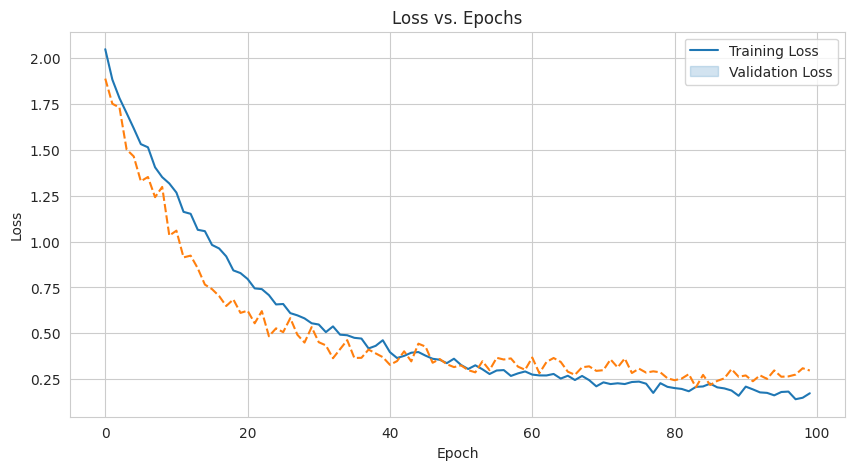

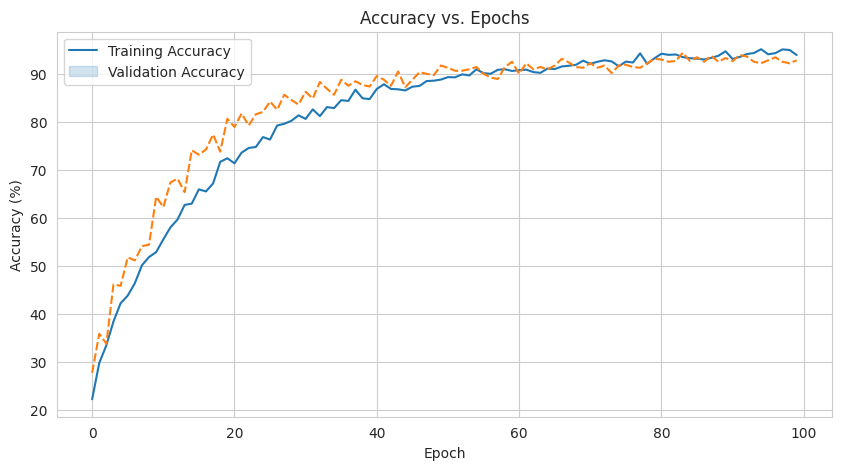

In [ ]:
history_df = pd.DataFrame(history)

# Set the style for the plots
sns.set_style("whitegrid")

# --- Plot 1: Training Loss vs. Validation Loss ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=history_df[['train_loss', 'val_loss']])
plt.title("Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


# --- Plot 2: Training Accuracy vs. Validation Accuracy ---
plt.figure(figsize=(10, 5))
# We multiply by 100 to show accuracy as a percentage
sns.lineplot(data=history_df[['train_acc', 'val_acc']] * 100)
plt.title("Accuracy vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
# predict on testing data samples (the accuracy here is batch accuracy)
y_pred_list = []
y_true_list = []
with torch.no_grad():
    with tqdm(test_dl, unit="batch") as tepoch:
        for inp, labels in tepoch:
            inp, labels = inp.to(device), labels.to(device)
            y_test_pred = model(inp)
            acc = multi_acc(y_test_pred, labels)
            _, y_pred_tag = torch.max(y_test_pred, dim = 1)
            tepoch.set_postfix(accuracy = acc.item())
            y_pred_list.append(y_pred_tag.cpu().numpy())
            y_true_list.append(labels.cpu().numpy())

100%|██████████| 19/19 [02:16<00:00,  7.16s/batch, accuracy=1]


In [ ]:
# flatten prediction and true lists
flat_pred = []
flat_true = []
for i in range(len(y_pred_list)):
    for j in range(len(y_pred_list[i])):
        flat_pred.append(y_pred_list[i][j])
        flat_true.append(y_true_list[i][j])

print(f"number of testing samples results: {len(flat_pred)}")

number of testing samples results: 303


In [ ]:
# calculate total testing accuracy
print(f"Testing accuracy is: {accuracy_score(flat_true, flat_pred) * 100:.2f}%")

Testing accuracy is: 84.16%


In [ ]:
# You need to run this cell first to get all predictions
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for data, target in test_dl: # Use the test DataLoader
        data, target = data.to(device), target.to(device)
        out = model(data)

        # Get predictions
        y_pred_softmax = torch.log_softmax(out, dim = 1)
        _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)

        y_pred.extend(y_pred_tags.cpu().numpy())
        y_true.extend(target.cpu().numpy())

# y_pred is now a list/array of all predicted labels for the test set
# Let's call it flat_pred as in your code
flat_pred = np.array(y_pred)


/tmp/ipython-input-3997587479.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  img_tensor = img_tensor * std + mean


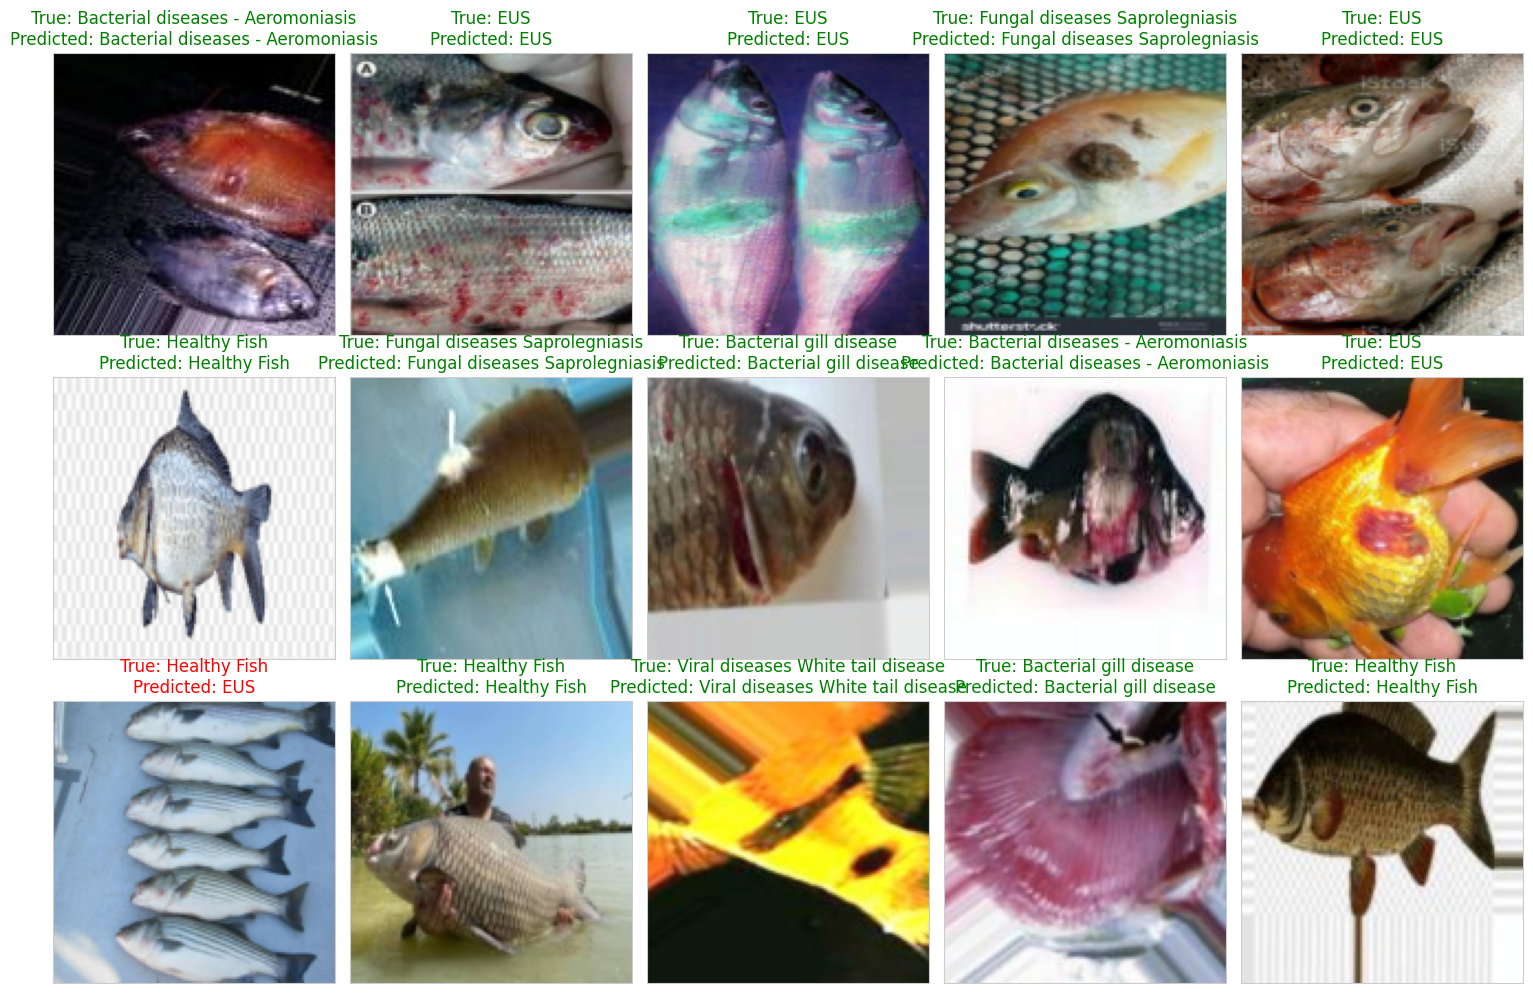

In [ ]:
# --- ADD THIS HELPER FUNCTION TO DE-NORMALIZE ---
def denormalize(img_tensor):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    # The permute is needed to align dimensions for broadcasting
    img_tensor = img_tensor.permute(1, 2, 0)
    img_tensor = img_tensor * std + mean
    # Clip values to be between 0 and 1
    img_tensor = np.clip(img_tensor, 0, 1)
    return img_tensor

# --- YOUR PLOTTING CODE (with the denormalize call added) ---
inds = np.random.randint(len(test_set), size=15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), # Made figure taller
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in zip(inds, axes.flat):
    img, label = test_set[i]

    # ADDED: De-normalize the image before plotting
    img_display = denormalize(img)

    ax.imshow(img_display)

    # This logic was correct, but I'll add a color code for clarity
    true_label = test_set.classes[label]
    pred_label = test_set.classes[flat_pred[i]]

    title_color = 'green' if true_label == pred_label else 'red'

    ax.set_title(f"True: {true_label}\nPredicted: {pred_label}", color=title_color)

plt.tight_layout()
plt.show()

In [ ]:

print(classification_report(y_true, y_pred, target_names=initial_dataset.classes))


                                   precision    recall  f1-score   support

            Bacterial Red disease       0.75      0.86      0.80        28
Bacterial diseases - Aeromoniasis       0.94      0.92      0.93        49
           Bacterial gill disease       0.91      0.89      0.90        45
                              EUS       0.80      0.62      0.70        56
   Fungal diseases Saprolegniasis       0.75      0.95      0.84        19
                     Healthy Fish       0.82      0.85      0.83        47
               Parasitic diseases       0.89      0.86      0.88        37
Viral diseases White tail disease       0.81      0.95      0.88        22

                         accuracy                           0.84       303
                        macro avg       0.83      0.86      0.84       303
                     weighted avg       0.84      0.84      0.84       303



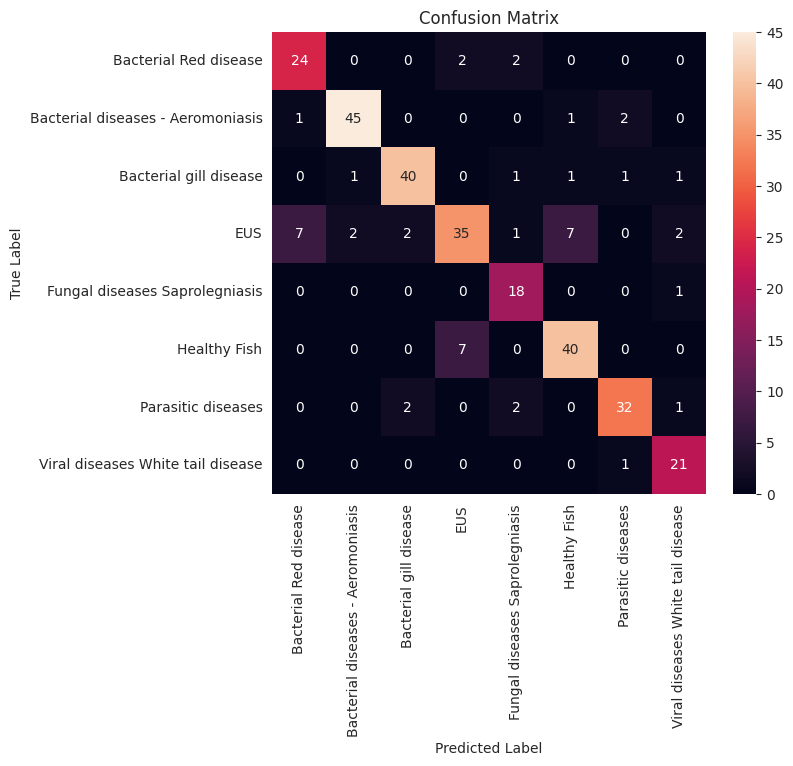

In [ ]:
# plot confusion matrix
plt.figure(figsize=(7, 6))
idx2class = {v: k for k, v in initial_dataset.class_to_idx.items()}
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True, fmt='g').set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label")
plt.show()

In [ ]:
torch.save(model.state_dict(), 'fish_classifier_model.pth')

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/fish_Classification/fish_classifier_model.pth')